# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#***Import Station***

In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline

from IPython.display import display
from tqdm import tqdm
from collections import Counter
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import seaborn as sb
from textblob import TextBlob
import scipy.stats as stats


from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA


#**Inspection of Data**

##Loading the Dataset


In [2]:
#mounting the drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading the dataset.
df = pd.read_csv('/content/drive/MyDrive/Capstone_Unsupervised_ML/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
df.head() #First Five rows of the dataset.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.tail() #Last Five rows of the dataset.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
#Total number of rows and columns in our data (Shape of our dataset)
df.shape

(7787, 12)

Our dataset is composed of **7787 rows** and **12 Feature Columns**

In [7]:
#information about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
#statistical analysis
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

As We can see here, **THERE ARE NULL VALUES IN OUR DATASET**

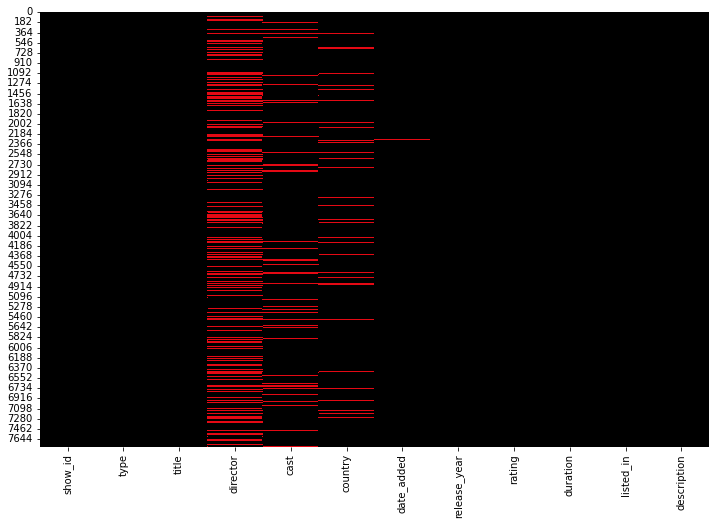

In [10]:
#visualizing the null values in the data
color = ['#000000','#E50914']
sns.set_palette(color)
palette = sns.color_palette()
cmap = ListedColormap(colors=palette)
cmap.set_bad(color='black', alpha=0.5)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.isnull(),cbar=False,cmap=cmap)

As we can see here,

> Column: ***Director, Cast, Country and date_added contrains null values***

but as in date_added only 10 rows contain null value so we will remove only those rows



#Cleaning the Data

##Treating the null values in columnn director and cast

In [11]:
col_directors = df[df.director != "No Director"].set_index("title").director.str.split(', ',expand=True).stack().reset_index(level=1,drop=True)

In [12]:
col_directors

title
7:19                                       Jorge Michel Grau
23:59                                           Gilbert Chan
9                                                Shane Acker
21                                            Robert Luketic
46                                               Serdar Akar
                                                 ...        
Zoo                                             Shlok Sharma
Zoom                                            Peter Hewitt
Zozo                                             Josef Fares
Zubaan                                           Mozez Singh
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS             Sam Dunn
Length: 6115, dtype: object

In [13]:
df['cast']=df['cast'].fillna('')

In [14]:
df['director']=df['director'].fillna('')

In [15]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [16]:
col_cast = df[df.cast != "No cast"].set_index("title").cast.str.split(", ", expand=True).stack().reset_index(level=1,drop=True)

In [17]:
col_cast

title
3%                                                   João Miguel
3%                                              Bianca Comparato
3%                                                  Michel Gomes
3%                                               Rodolfo Valente
3%                                               Vaneza Oliveira
                                                   ...          
Zubaan                                     Chittaranjan Tripathy
Zulu Man in Japan                                        Nasty C
Zumbo's Just Desserts                              Adriano Zumbo
Zumbo's Just Desserts                                Rachel Khoo
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS                         
Length: 56673, dtype: object

Removing rows with null values in the date_added column

In [18]:
df.date_added.isnull().sum()

10

In [19]:
df.dropna(subset=['date_added'], inplace=True)

Removing rows with null values in the rating column

In [20]:
df.rating.isnull().sum()

7

In [21]:
df.dropna(subset=['rating'], inplace=True)

let's check the shape now

In [22]:
df.shape

(7770, 12)



> Introducing a new column - "year_added" column to get the year in which movie was added to netflix



In [23]:
# Create new features to store date, day, month and year seperately.
df["date_added"] = pd.to_datetime(df['date_added'])  # First convert date_added to date time format.
df['day_added'] = df['date_added'].dt.day            # Compute day.
df['year_added'] = df['date_added'].dt.year          # Compute year.
df['month_added'] = df['date_added'].dt.month    

In [24]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1


#Exploratory Data Analysis

Netflix Content Analysis

In [25]:
#Let's plot a pie chart on type feature
colors = ['#564d4d','#db0000']
labels = ['Tv Show', 'Movie']
tv_show = df.type.value_counts()[1]
movie = df.type.value_counts()[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=[tv_show, movie], hole=.5)])
fig.update_layout(
    title_text="Netflix Content Analysis",title_x=0.5, legend=dict(x=0.9),height=500, width=500,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Content Type.', font_size=20, showarrow=False)])
fig.update_traces(marker=dict(colors=colors))

fig.show()

Inference gained : **68.1% of the content available on Netflix are movies ands 30.9% of the content are TV shows.**

##Growth of content over years : 

In [26]:
#Analysing number movie and tv show in a year
tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]

col = "year_added"

content_1 = tv_show[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "count", "index" : col})
content_1 = content_1.sort_values(col)

content_2 = movie[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "count", "index" : col})
content_2 = content_2.sort_values(col)

trace1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color="#db0000"))
trace2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color="#564d4d"))

data = [trace1, trace2]
layout = go.Layout(title="Content added over the years",title_x=0.47, legend=dict(x=0.4, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()




*   Relative growth is seen in the number of movies on Netflix than TV shows
*   Increase in number of movies and Tv shows is noticeable from year 2015 
*   In 2019 and 2020, highest number of movies and TV shows were added by Netflix on its platform

*  Very few movies and Tv shows were recorded in 2021, due to very less data recorded in the same year.



##Analysis based on a country

### What kind of content is available in different countries in recent years? 

In [27]:
country_null_values = df.country.isnull().sum()
print(f' {country_null_values} ')

 505 


We had observed that variable country had 506 null values in it, we will replace these null values with the most occurring country which is United States.

In [28]:
#Group by content type and country to see the content top ten countries  produce and the type of content these countries provide
df['country'].fillna('United States', inplace=True)
df['country_single']=df['country'].apply(lambda x: x.split(",")[0])
order_ = df['country_single'].value_counts()[:10].index
country_vs_content = df[['type', 'country_single']].groupby('country_single')['type'].value_counts().unstack().loc[order_].reset_index()


In [29]:
# Plot the above data.
fig = go.Figure()
fig.add_trace(go.Bar(y=country_vs_content['index'],x=country_vs_content['TV Show'],name='TV Show',orientation='h',marker=dict(color='rgba(75, 77, 77, 1)')))
fig.add_trace(go.Bar(y=country_vs_content['index'],x=country_vs_content['Movie'],name='Movies',orientation='h',marker=dict(color='rgba(227, 0, 0, 1)')))
fig.update_layout(barmode='stack',yaxis=dict(autorange="reversed"),title={'text': 'Top ten countries and the content they provide.','x':0.5,'y':0.89,'font_size':25,'xanchor': 'center','yanchor': 'top'})
fig.show()


* As we can see here, United States is the leading producer of both movies and tv shows, since netflix is a US company this makes sense.
* India stands seconds via the influence of bollywood which explains the type of content available which mainly focuses on movies rather than tv shows.
* Japan and Korea are more frequent in Tv shows which explains the KDrama and Anime culture nowadays.

###Genre vs Country 

In [30]:
#Create a dummy dataset with the required data
cvg = df[['country','listed_in']]

#creating a function to seperate all genres
def country_genre(country):
  cg = cvg[cvg['country'] == country]
  cg = ", ".join(cg['listed_in'].dropna()).split(", ")
  cg_dict = dict(Counter(cg))
  return cg_dict


#Defining the list  of top ten countries providing the netflix content
countrylist_ = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']
#Creating an empty dictionary to store values of each genre of each country
cwg_dict = {}
#Iterating through all values in countrylist_
for i in countrylist_:
  genre_ = country_genre(i)
  cwg_dict[i] = genre_
  cg_count_df = pd.DataFrame(cwg_dict).reset_index()
  cg_count_df.rename({'index': 'Genre'}, inplace = True, axis = 1) 

In [31]:
cg_count_df.head()

,Genre,United States,India,United Kingdom,Canada,Japan,France,South Korea,Spain,Mexico,Australia
0,Action & Adventure,211,124.0,19.0,12.0,42.0,12.0,13.0,3.0,2.0,3.0
1,Independent Movies,287,129.0,24.0,15.0,NaN,8.0,NaN,11.0,12.0,4.0
2,Sci-Fi & Fantasy,102,10.0,6.0,5.0,7.0,1.0,3.0,2.0,2.0,2.0
3,Dramas,561,589.0,37.0,21.0,9.0,29.0,18.0,35.0,22.0,16.0
4,Thrillers,179,85.0,15.0,11.0,1.0,3.0,12.0,18.0,1.0,4.0


In [32]:
net_df = cg_count_df

# Define colours to be used.
colors = ['aggrny', 'blackbody', ' bluered', 'blues', ' blugrn ', 'bluyl  ', 'darkolivegreen', 'darkorange', 'darkturquoise', 'darkviolet', 'deeppink', 'forestgreen','#0d0887', '#46039f', '#7201a8', '#9c179e', '#bd3786', '#d8576b', '#ed7953', '#fb9f3a', '#fdca26', '#f0f921' 'paleturquoise',
          'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown','seagreen', 'seashell', 'sienna', 'silver', 'slategray', 'snow',
          'springgreen', 'tomato','yellow', 'yellowgreen']

# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs, subplot_titles=['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'])

# Define traces.
fig.add_trace(go.Pie(labels=net_df['Genre'], values=net_df['United States'], name='United States',  hole=.3),1,1)
fig.add_trace(go.Pie(labels=net_df['Genre'], values=net_df['India'],  name='India',  hole=.3),1,2)
fig.add_trace(go.Pie(labels=net_df['Genre'], values=net_df['United Kingdom'],  name='United Kingdom',  hole=.3),1,3)
fig.add_trace(go.Pie(labels=net_df['Genre'], values=net_df['Canada'],  name='Canada',  hole=.3),1,4)
fig.add_trace(go.Pie(labels=net_df['Genre'], values=net_df['Japan'],  name='Japan',  hole=.3),1,5)
fig.add_trace(go.Pie(labels=net_df['Genre'], values=net_df['France'],  name='France',  hole=.3),2,1)
fig.add_trace(go.Pie(labels=net_df['Genre'], values=net_df['South Korea'],  name='South Korea',  hole=.3),2,2)
fig.add_trace(go.Pie(labels=net_df['Genre'], values=net_df['Spain'],  name='Spain',  hole=.3),2,3)
fig.add_trace(go.Pie(labels=net_df['Genre'], values=net_df['Mexico'],  name='Mexico',  hole=.3),2,4)
fig.add_trace(go.Pie(labels=net_df['Genre'], values=net_df['Australia'],  name='Australia',  hole=.3),2,5)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='none', marker=dict(colors=colors))
fig.update_layout(title={'text': 'Top ten countries and the content they provide.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1250,paper_bgcolor='white',
                  legend=dict(x=0.099,orientation="h")
                          )
fig = go.Figure(fig)
fig.show()


* Drama, International Movies, and Comedies seem popular choices in most countries.
* British and International Tv Shows dominate in the United Kingdom.
Regional specialties such as Anime in Japan and Korean Tv shows in South Korea are more prominent in these countries; This makes sense as anime has always been popular in Japan, and the rising k-pop culture explains the increase in Korean Tv Shows.
* It's also observed that in the countries where the regional language is not English, International Tv Shows and Movies are more in demand.

###As we saw before, In which year most of the content was added, let's find out the year of release

In [33]:
release_yr_bin = pd.cut(df.release_year, [1924, 1999, 2010, 2021])
release_yr_bin.value_counts()
release_yr_bin = pd.DataFrame(release_yr_bin.value_counts()).reset_index()
release_yr_bin.rename(columns={'index':'year_interval', 'release_year':'count'}, inplace=True)
release_yr_bin['year_interval'] = release_yr_bin['year_interval'].astype('string')
release_yr_bin

,year_interval,count
0,"(2010, 2021]",6425
1,"(1999, 2010]",896
2,"(1924, 1999]",449


In [34]:
# Plot it.
fig = px.pie(release_yr_bin, values='count', names='year_interval', color_discrete_sequence=['#564d4d','#db0000'], title='When was most content released.',height=500, width=500)
fig.show()




> As we can see 82.7% of the content was released between the year of 2010 - 2021

> Before 2010 only 17.28% content was released.



### Creating the word cloud to see which appear words appear the most in the titles of the movies and tvshows.

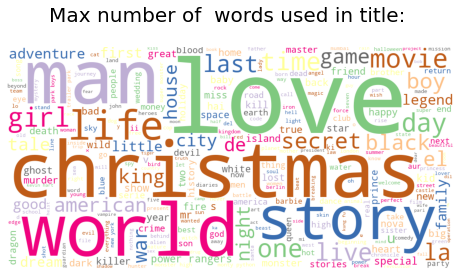

In [35]:
#import the wordcloud library
from wordcloud import WordCloud,STOPWORDS   

#here we will create an empty string to store all the words
comment_words = ' '

#removal of stop words
stopwords = set(STOPWORDS)

#iterate through the column
for value in df.title:
  #typecasting each value  to string
  value = str(value)

  #split the value
  tokens = value.split()

  # lowercase conversion
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

  comment_words = comment_words+" ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height= 500,background_color ="white",stopwords=stopwords,min_font_size=10,max_words=1000,colormap='Accent').generate(comment_words)



#plot the graph
plt.figure(figsize = (8,8), facecolor= None)
plt.title("Max number of  words used in title: ", fontsize= 20 , pad =25 )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* Christmas, Love, World, Man, and Story are the most repeated words including in the  title.

* Also we can say that christmas being appeared many times as a sign we saw earlier of most of the movies and tv shows got released during the winters.

### Similarly Creating the word cloud to see which appear words appear the most in the description  of the movies and tv shows.

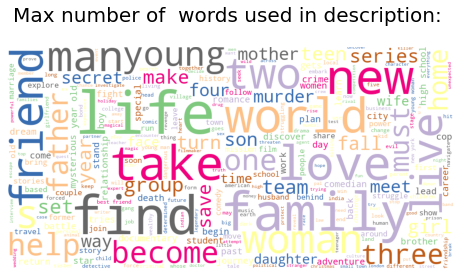

In [36]:
#import the wordcloud library
from wordcloud import WordCloud,STOPWORDS   

#here we will create an empty string to store all the words
comment_words = ' '

#removal of stop words
stopwords = set(STOPWORDS)

#iterate through the column
for value in df.description:
  #typecasting each value  to string
  value = str(value)

  #split the value
  tokens = value.split()

  # lowercase conversion
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

  comment_words = comment_words+" ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height= 500,background_color ="white",stopwords=stopwords,min_font_size=10,max_words=1000,colormap='Accent').generate(comment_words)



#plot the graph
plt.figure(figsize = (8,8), facecolor= None)
plt.title("Max number of  words used in description: ", fontsize= 20 , pad =25 )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Family, Friend, Love, Life, Woman, Man are the most occurring words in the description of the tv shows and movies.

###Duration

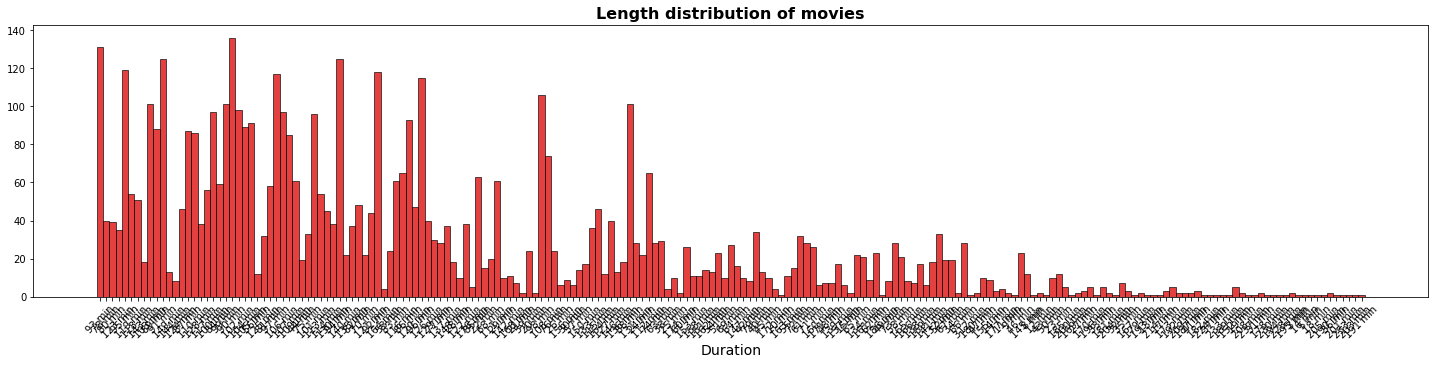

In [37]:
# Length distribution of movies


plt.figure(figsize=(25, 5))

ax = sns.histplot(movie['duration'], bins=30,color='#db0000').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()


Most of the movies last for 90 to 120 minutes.

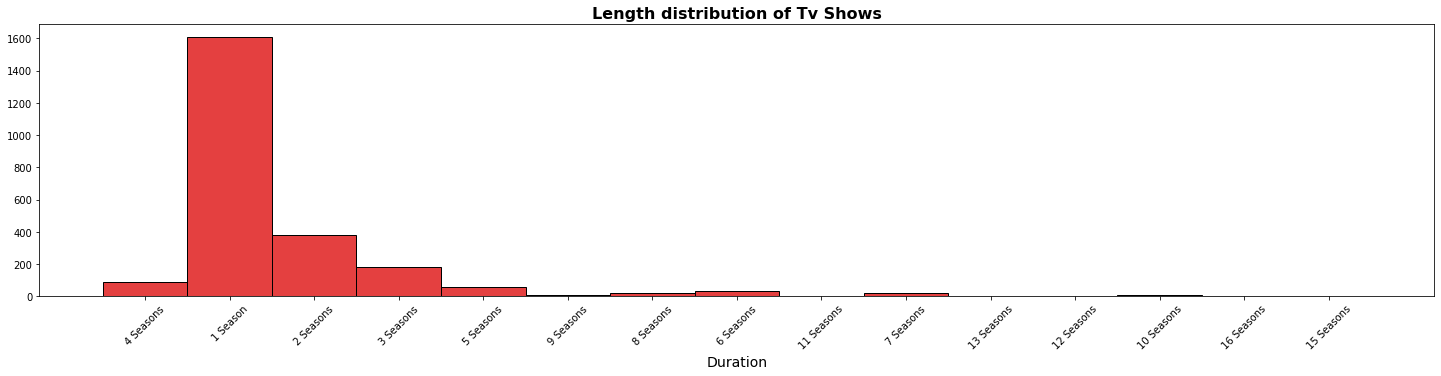

In [38]:
# Length distribution of Tv show


plt.figure(figsize=(25, 5))

ax = sns.histplot(tv_show['duration'], bins=30,color='#db0000').set(ylabel=None)

plt.title('Length distribution of Tv Shows', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

Most of the Tv Shows last for more than 1 or 2 seasons, very few tv shows are listed for more than 5 seasons.

###Top 25 Directors whose content is available on Netflix


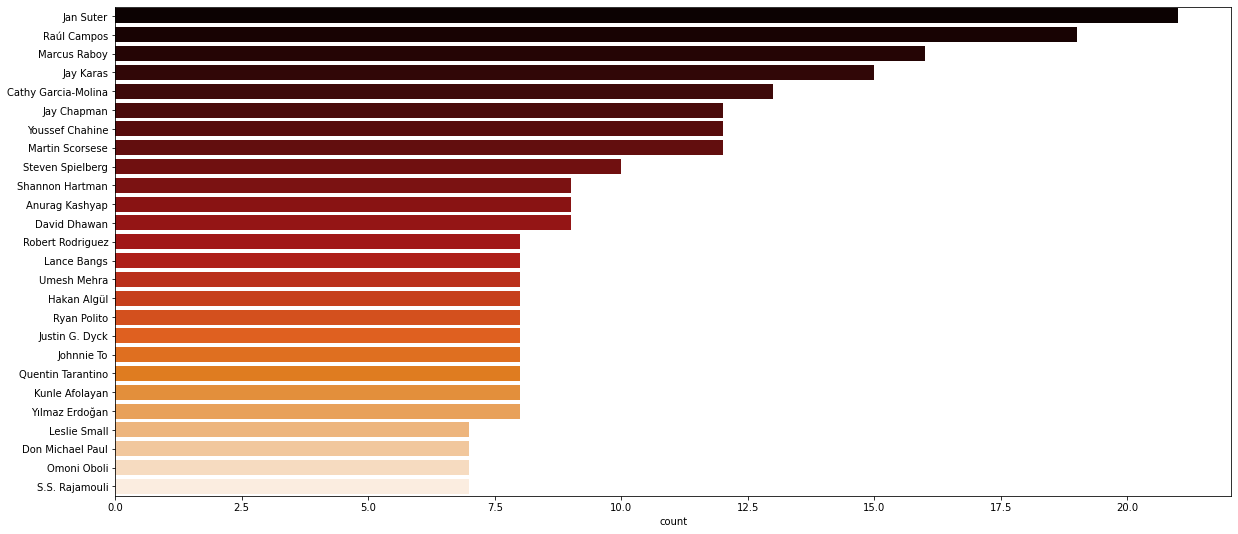

In [39]:
plt.figure(figsize = (20,9))
sns.countplot(y = col_directors, order=col_directors.value_counts().index[:26], palette='gist_heat')
plt.show()

###Top 10 actors whose content is available in netflix

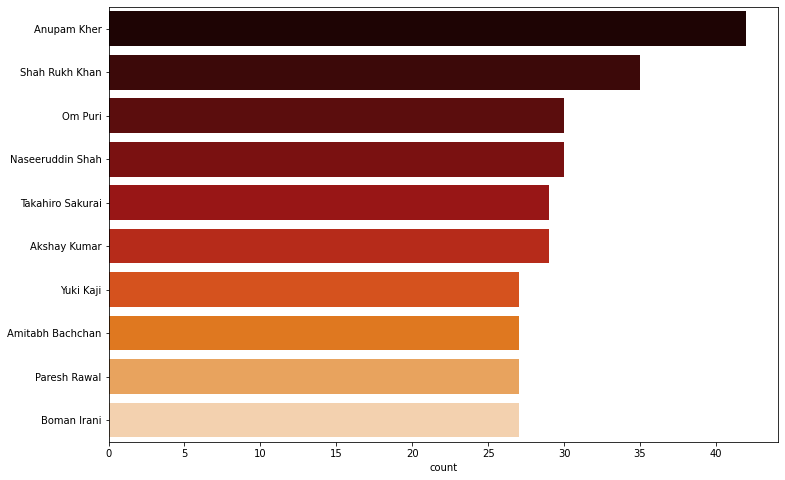

In [40]:
plt.figure(figsize = (12,8))
sns.countplot(y = col_cast, order=col_cast.value_counts().index[1:11], palette='gist_heat')
plt.show()

Delightful to see indian actors in the top 6. 

In [41]:
tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,1,2017,7
11,s12,TV Show,1983,,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",30,2018,11
12,s13,TV Show,1994,Diego Enrique Osorno,,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,17,2019,5
16,s17,TV Show,Feb-09,,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",20,2019,3


###Top Tv Show ratings

Each TV show and movie on Netflix is assigned a maturity rating to help members make informed choices for themselves and their children.Netflix determines maturity ratings by the frequency and impact of mature content in a TV show or movie. TV show ratings reflect the overall maturity level of the whole series.

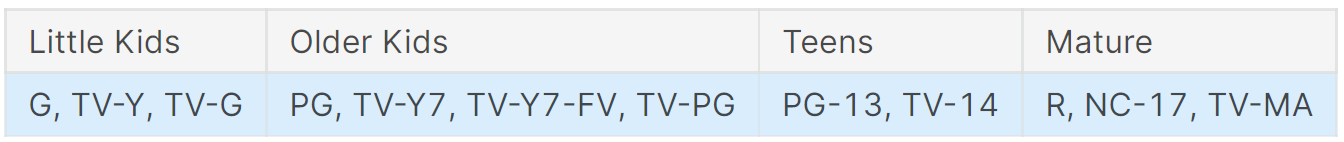

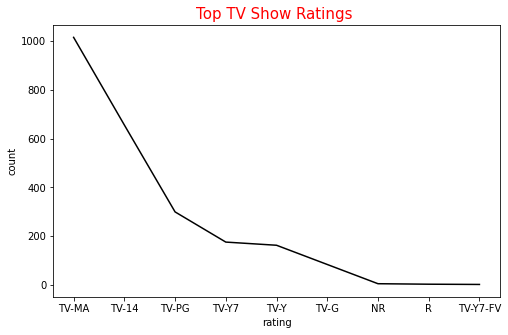

In [42]:
tv_ratings = tv_show.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending= False)
#lineplot on top tv show ratings
fig, ax = plt.subplots(figsize=(8,5))  
sns.lineplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings ',size='15',color='r')
plt.show()

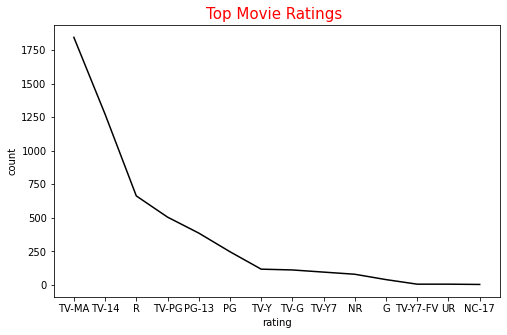

In [43]:
movie_ratings = movie.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)

fig, ax = plt.subplots(figsize=(8,5))  
sns.lineplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings ',size='15',color='r')
plt.show()

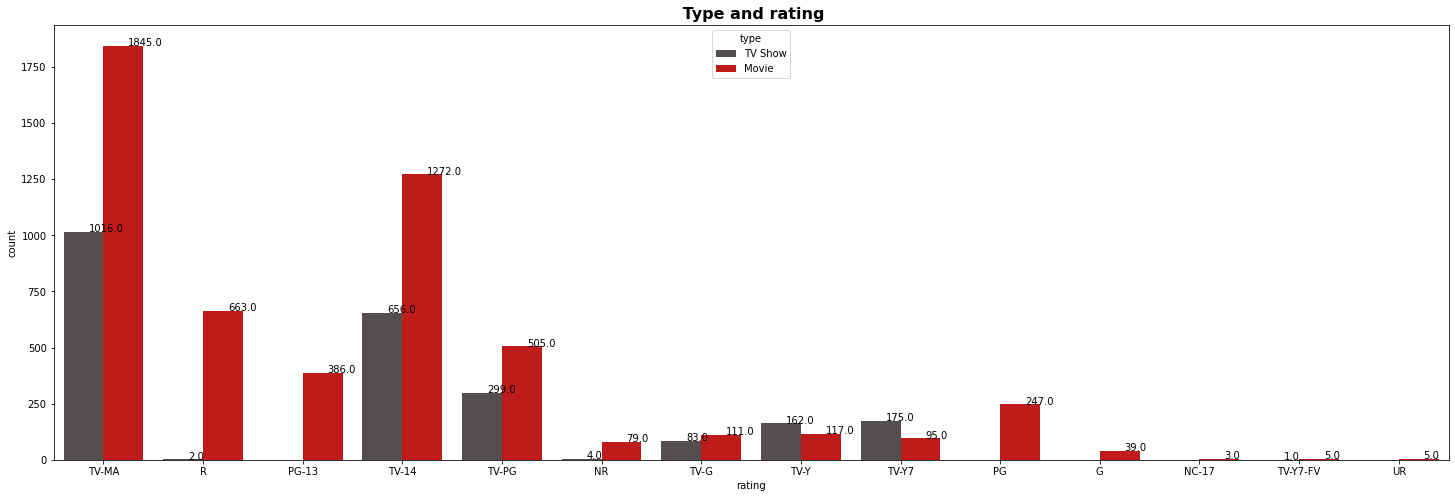

In [44]:
# Rating of Tv Shows and Movies
plt.figure(figsize=(25,8))
ax = sns.countplot(x='rating',hue='type',data=df,palette=['#564d4d','#db0000'], )
plt.title(' Type and rating',size='16',fontweight="bold")

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

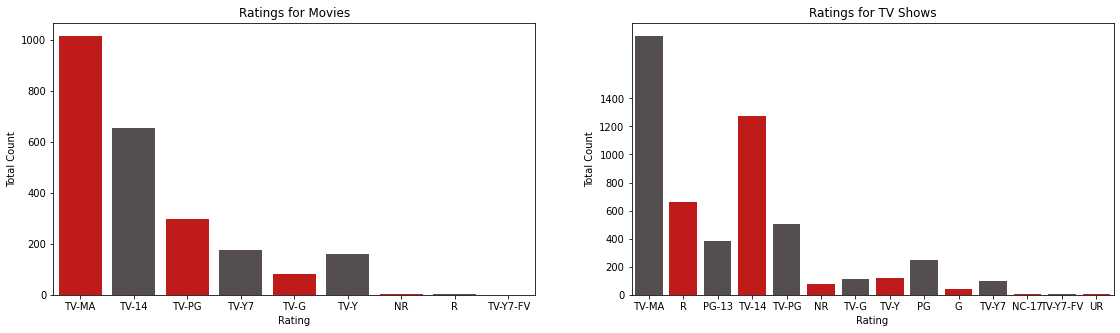

In [45]:
#for TV show and movies individually
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(tv_show.rating,palette=['#db0000','#564d4d'], ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")
g2 = sns.countplot(movie.rating,palette=['#564d4d','#db0000'], ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
fig.show()


> TV-MA tops the charts, indicating that mature content is more popular on Netflix.
* This popularity is followed by TV-14 and TV-PG, which are Shows focused on 
Teens and Older kids.
* Very few titles with a rating NC-17 exist. It can be understood since this type of content is purely for the audience above 17.

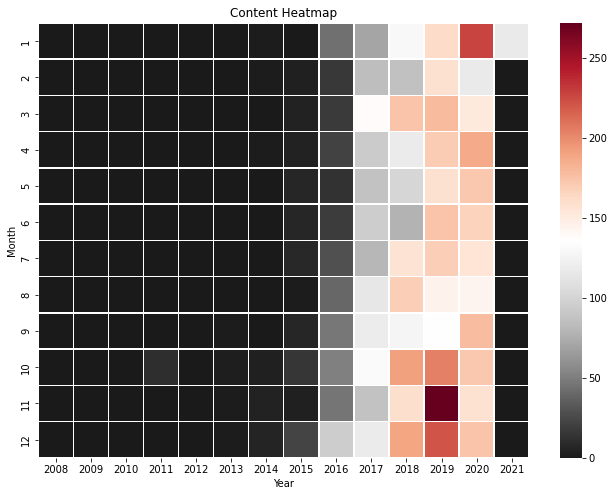

In [46]:
#Corelation Heatmap 
month_year_df = df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=.5, cmap="RdGy_r")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

> From around 2014 is when Netflix began to increase their content count. We can see over the years and months 
* Netflix continues to slowly increase the amount of content that is being added into their platform.

*  We can see in 2020, the data stops at January since that is the latest month available in the dataset.

#Data Prerocessing

###We need to create clusters for our data now using text columns

In [ ]:
cluster_df = df[['title']]
cluster_df['cluster_data'] = (df['description'] + ' ' + df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()
cluster_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


###creating a function to remove the punctuation

In [ ]:
def remove_punct(text):
  import string
  translator = str.maketrans('','',string.punctuation)
  return text.translate(translator)

In [ ]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punct)
cluster_df.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...


###Removing the stop words

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
#creating a function to remove the stop words
def stopwords(text):
  text = [word.lower() for word in text.split() if word.lower() not in stop_words]
  return " ".join(text)

In [ ]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



title
3%      future elite inhabit island paradise far crowd...
7:19    devastating earthquake hits mexico city trappe...
Name: cluster_data, dtype: object

In [ ]:
#Creating an object of a stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
  ''' this function will stem each word in the given text '''
  text = [stemmer.stem(word) for word in text.split()]
  return " ".join(text)

In [ ]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cluster_data
title,
3%,futur elit inhabit island paradis far crowd sl...
7:19,devast earthquak hit mexico citi trap survivor...


In [ ]:
bag_of_words = cluster_df.cluster_data

#Creating the cluster:

In [ ]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
print(X.shape)

(7770, 20000)


In [ ]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'ştar', 'şçil', 'şükrü'], dtype=object)

##Dimensionality Reduction


In [ ]:
pca = PCA()
pca.fit(X.toarray())

PCA()

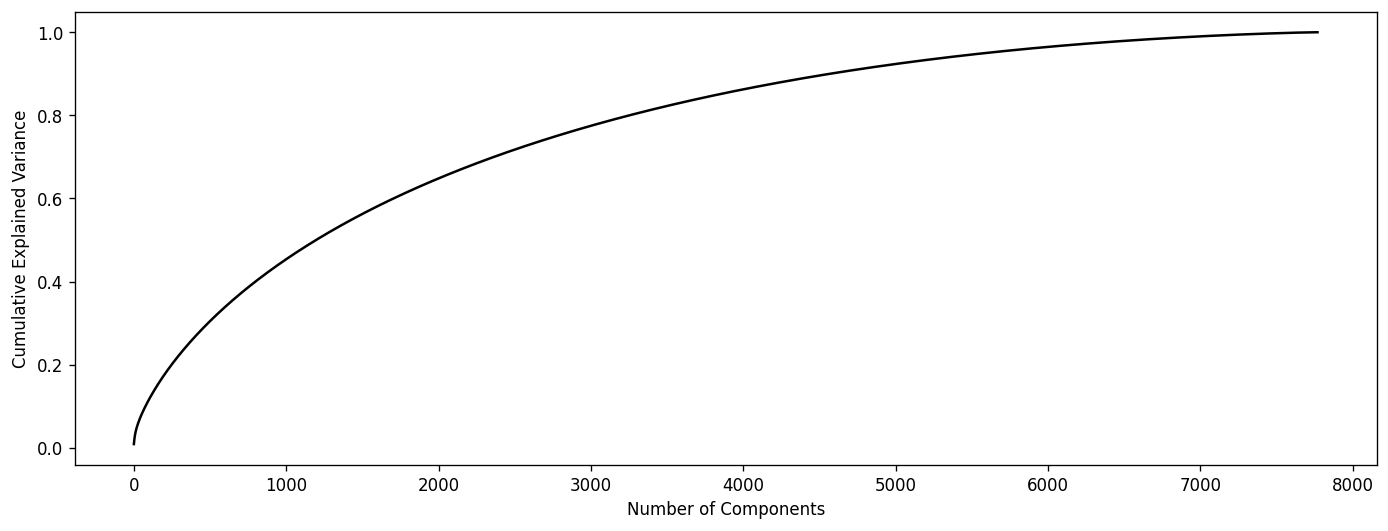

In [ ]:
#plotting number of components vs cumulative explained variance
plt.figure(figsize=(14,5), dpi = 120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

* 95% of the variance can be explained by 5000 components.

In [ ]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

(7770, 5591)

In [ ]:
X_transformed

array([[ 0.12381384,  0.01878768, -0.01985089, ..., -0.01290126,
        -0.0061675 ,  0.00134415],
       [-0.03957416,  0.03685093, -0.00068804, ...,  0.01741727,
        -0.00170697,  0.00722743],
       [-0.04426074,  0.04240966, -0.03652511, ...,  0.00155654,
         0.00456558, -0.00629564],
       ...,
       [-0.08081921, -0.0809065 ,  0.27382203, ...,  0.00364216,
        -0.00489299,  0.01251322],
       [ 0.10148378, -0.00405508,  0.01560673, ..., -0.00551716,
        -0.01236381,  0.01055393],
       [-0.09251356, -0.20593119,  0.35063681, ..., -0.00786756,
         0.00438817,  0.00044112]])

#Optimum K value using Metric:Silhouette Method

In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


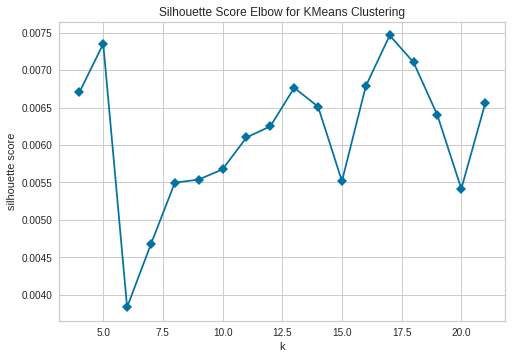

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
plot = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)
plot.fit(X_transformed)
plot.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer


In [ ]:
#creating a function for silhouette plot
from sklearn.metrics import silhouette_score, silhouette_samples
def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data


For n_clusters = 2, silhouette score is 0.0047721176143510746


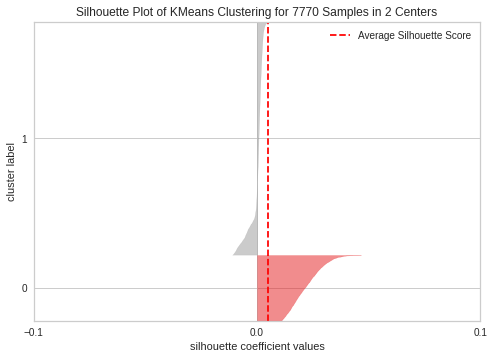

For n_clusters = 3, silhouette score is 0.005919120526288965


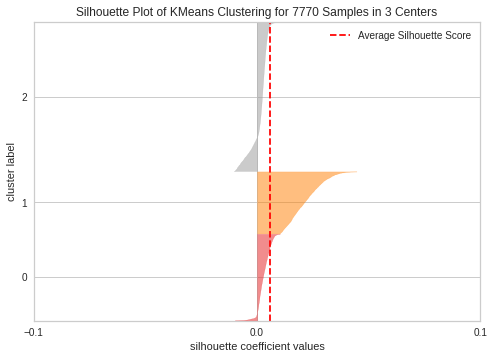

For n_clusters = 4, silhouette score is 0.00670274740576397


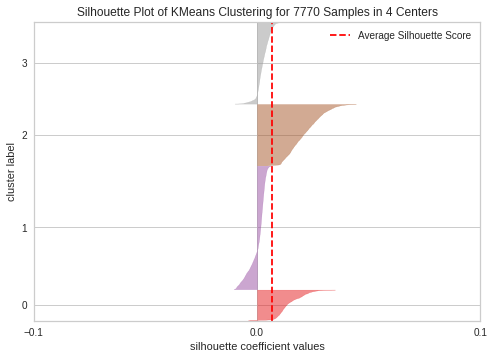

For n_clusters = 5, silhouette score is 0.007350213894115626


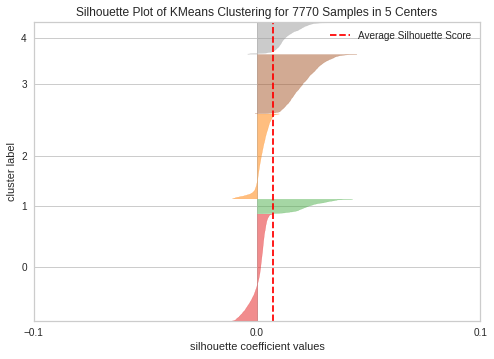

For n_clusters = 6, silhouette score is 0.003833635359469857


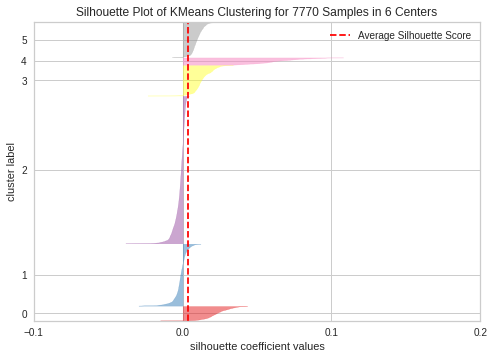

For n_clusters = 7, silhouette score is 0.00467803783104266


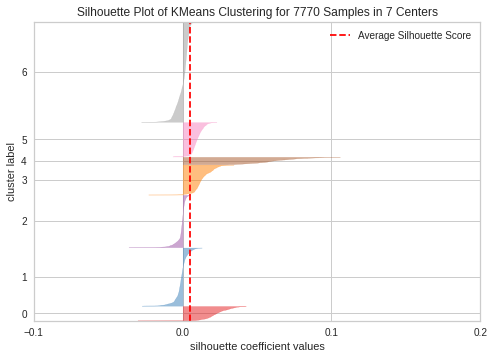

For n_clusters = 8, silhouette score is 0.00549681474120132


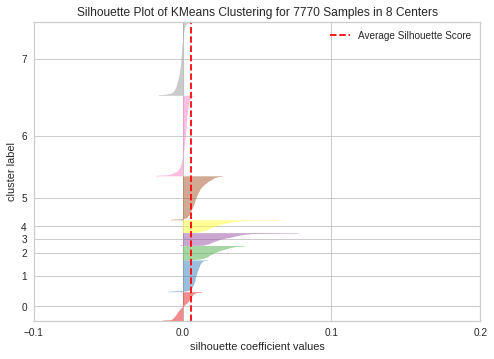

For n_clusters = 9, silhouette score is 0.005538054493019302


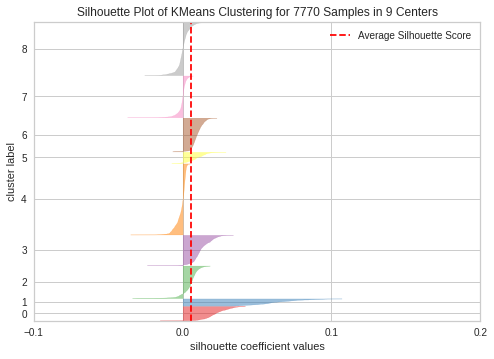

For n_clusters = 10, silhouette score is 0.005675363522968466


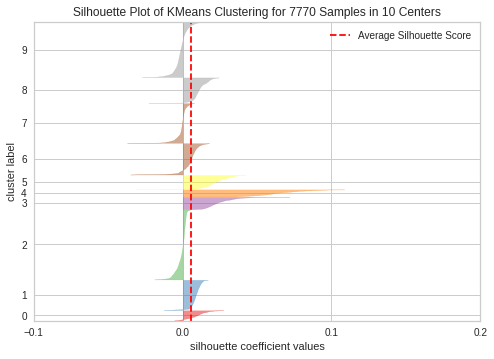

For n_clusters = 11, silhouette score is 0.006100011712560611


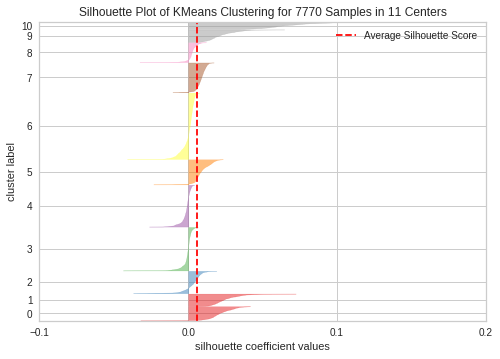

For n_clusters = 12, silhouette score is 0.006249400404526546


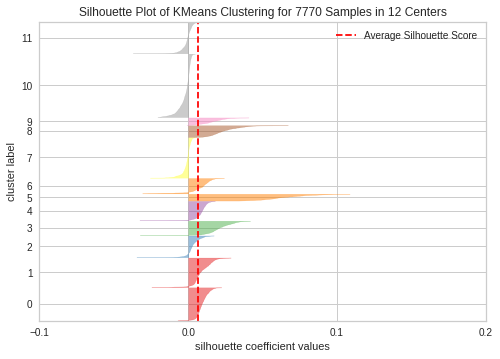

For n_clusters = 13, silhouette score is 0.006763514456040729


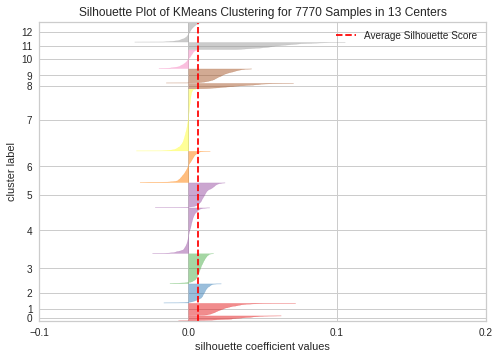

For n_clusters = 14, silhouette score is 0.006511523549925806


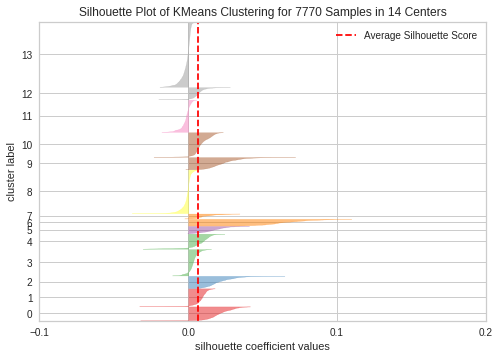

For n_clusters = 15, silhouette score is 0.005516143087294644


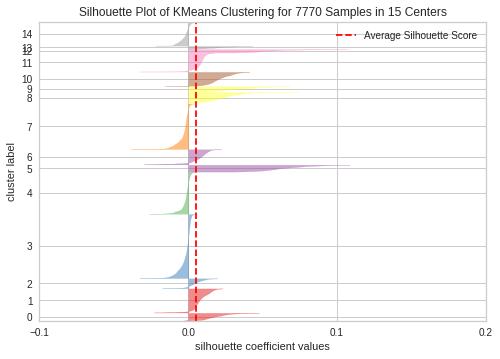

For n_clusters = 16, silhouette score is 0.006786074313056253


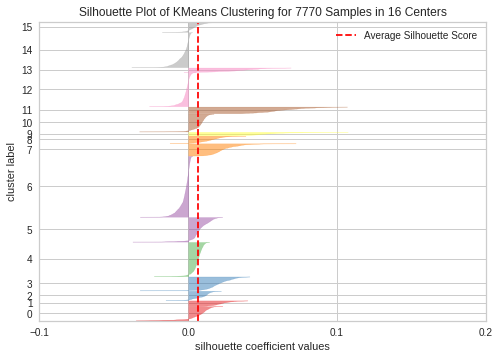

For n_clusters = 17, silhouette score is 0.007462935859315744


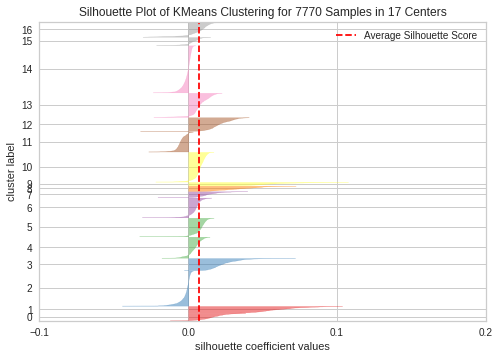

For n_clusters = 18, silhouette score is 0.0071030398309007165


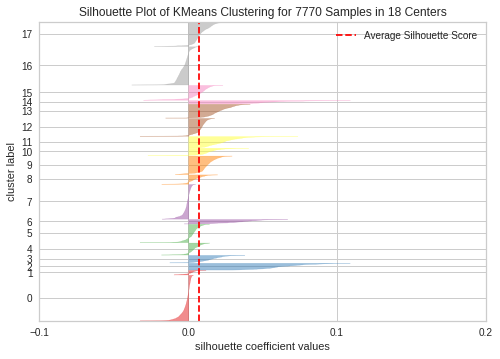

For n_clusters = 19, silhouette score is 0.006396283888182606


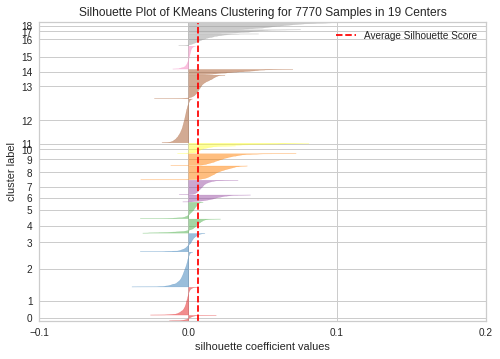

For n_clusters = 20, silhouette score is 0.005414776619067895


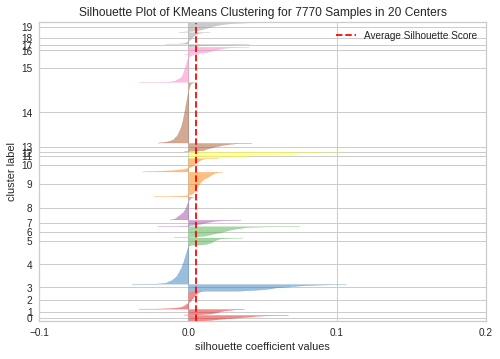

For n_clusters = 21, silhouette score is 0.0065541615624685


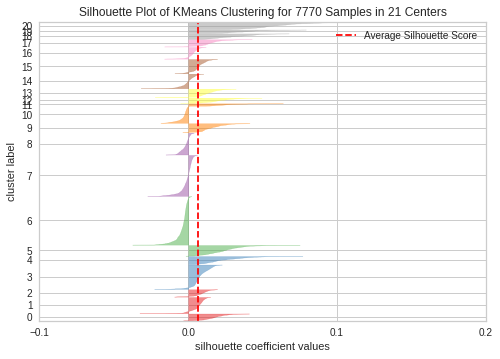

In [ ]:
silhouette_score_analysis(22)

##Elbow method to find optimum k value:



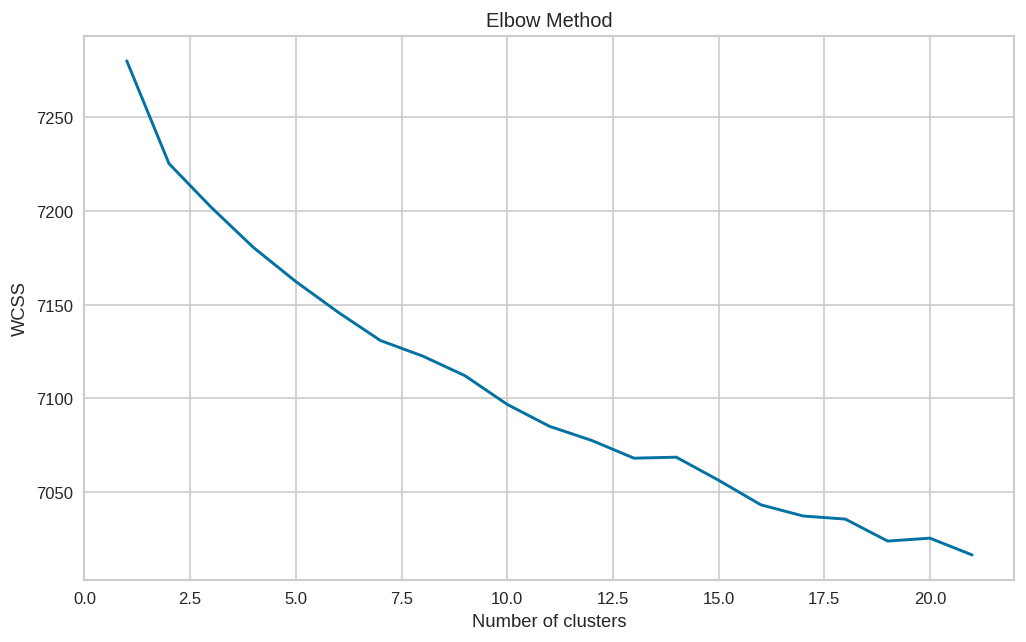

In [ ]:
plt.figure(figsize=(10,6),dpi=120)
wcss = []
for i in range(1,22):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=0)
  kmeans.fit(X_transformed)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,22),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

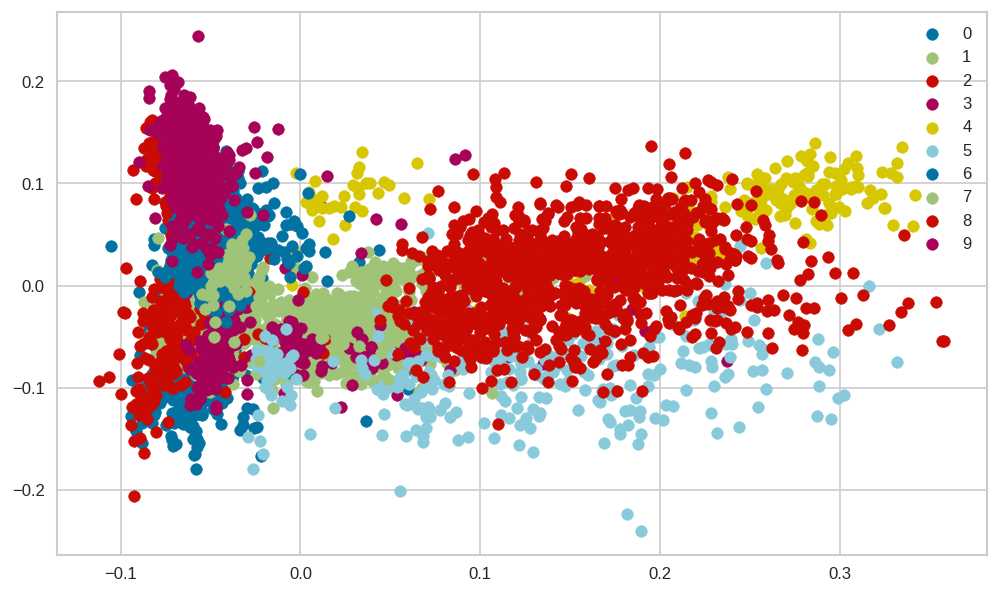

In [ ]:
#ploting the figure 
plt.figure(figsize=(10,6),dpi=120)

kmeans = KMeans(n_clusters=10, init='k-means++', random_state=9)
kmeans.fit(X_transformed)

#predicting the labels of the clusters
label = kmeans.fit_predict(X_transformed)

#Getting unique labels
uq_labels = np.unique(label) 


#ploting
for i in uq_labels:
  plt.scatter(X_transformed[label==i,0], X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

* Here we performed clustering considering K = 10.

In [ ]:
#adding cluster values
df['cluster_number']=kmeans.labels_ 

In [ ]:
#creating a function to generate wordcloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = df[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

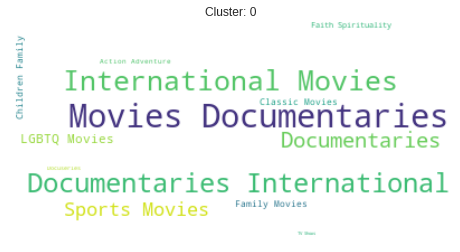

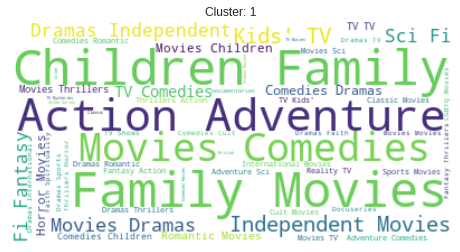

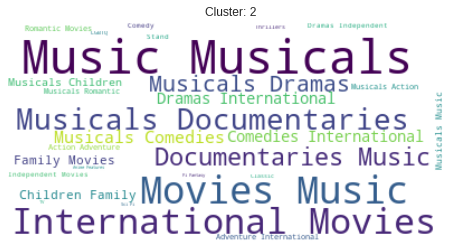

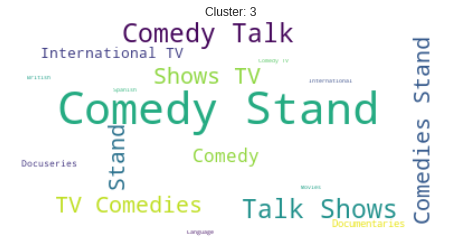

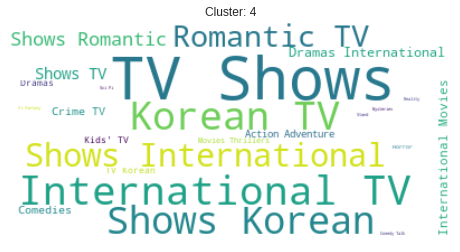

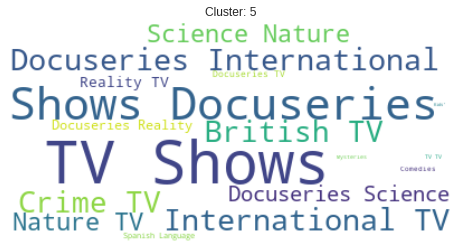

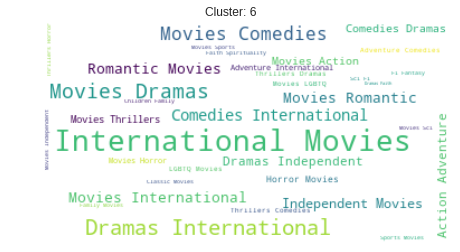

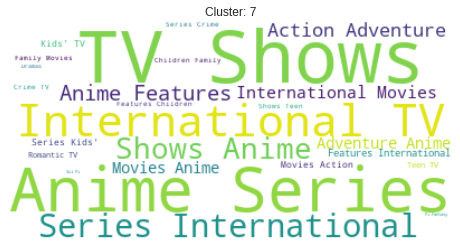

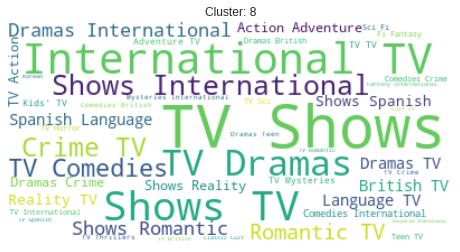

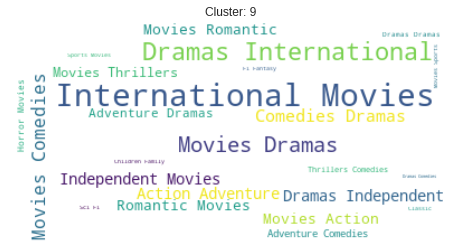

In [ ]:
#iterating the plots
for i in range(10):
  func_select_Category(i,'listed_in')

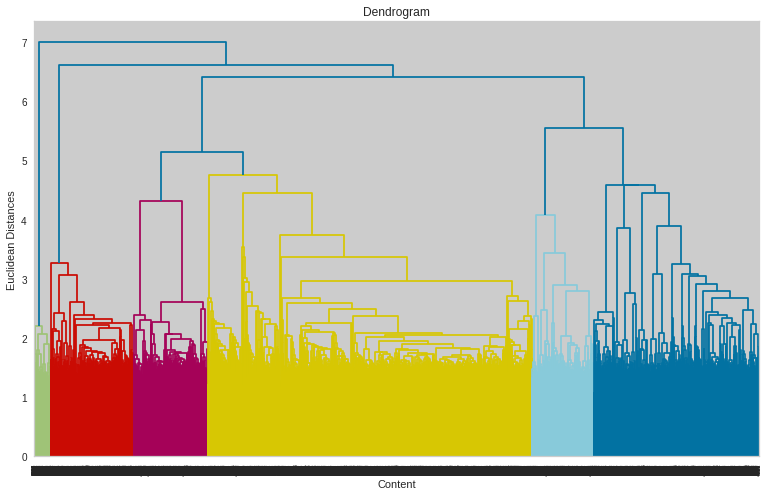

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X_transformed, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()

No of Clusters = 10

#Recommendations BOX


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
t_vectorizer = TfidfVectorizer()
count_matrix= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
cos_sim = cosine_similarity(count_matrix, count_matrix)
cos_sim

array([[1.        , 0.05131566, 0.01994169, ..., 0.00533143, 0.02253936,
        0.00320396],
       [0.05131566, 1.        , 0.00549713, ..., 0.05254157, 0.0020932 ,
        0.00369168],
       [0.01994169, 0.00549713, 1.        , ..., 0.00758132, 0.00209997,
        0.        ],
       ...,
       [0.00533143, 0.05254157, 0.00758132, ..., 1.        , 0.00288681,
        0.20715934],
       [0.02253936, 0.0020932 , 0.00209997, ..., 0.00288681, 1.        ,
        0.02478001],
       [0.00320396, 0.00369168, 0.        , ..., 0.20715934, 0.02478001,
        1.        ]])

In [ ]:
spl_indices = pd.Series(cluster_df.index)
spl_indices[:5]

0       3%
1     7:19
2    23:59
3        9
4       21
Name: title, dtype: object

In [ ]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommend(Title, cos_sim = cos_sim):
    
    movies_recommended = []
    
    # gettin the index of the movie that matches the title
    indices = spl_indices[spl_indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cos_sim[indices]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
       movies_recommended.append(list(cluster_df.index)[i])
        
    return movies_recommended

In [ ]:
# Lets try getting recommendations for Movies.
movie_recommendations = pd.DataFrame(recommend('Naruto'), columns=['Recommendations'])
movie_recommendations.head(11)

,Recommendations
0,Naruto Shippûden the Movie: Bonds
1,Naruto Shippuden : Blood Prison
2,Naruto the Movie 2: Legend of the Stone of Gelel
3,Naruto Shippuden: The Movie
4,Naruto Shippûden the Movie: The Will of Fire
5,Naruto the Movie 3: Guardians of the Crescent ...
6,Naruto Shippuden: The Movie: The Lost Tower
7,Marvel Anime: Wolverine
8,Dragon's Dogma
9,Saint Seiya: The Lost Canvas


In [ ]:
#checking for a tv show
movie_recommendations = pd.DataFrame(recommend('Sacred Games'), columns=['Recommendations'])
movie_recommendations.head(11)

,Recommendations
0,AK vs AK
1,Tukaram
2,Baazaar
3,Seven (Tamil)
4,Raman Raghav 2.0
5,GHOUL
6,The Indian Detective
7,Seven (Telugu)
8,Lust Stories
9,Bombay Talkies


#Conclusions:


* First comes first, Information about our data set which comprises of 7787 rows and 12 columns, where columns like director,cast,country,date_added had some null values which were treated accordingly.

* Insights from our Exploratory Data analysis : 
  * 68.1% of the content available on Netflix are movies ands 30.9% of the content are TV shows.
  * Relative Growth is observed here in the number of movies on Netflix than TV Shows
  * 2015 was the year where the spike of growth began , 2019 and 2020 were the peak years where highest number of movies and tv shows were added on netflix.
  * It is noticed that US, India and UK majorly create movies on this platform.
  * Jan suter is the most popular director on netflix
  * Anupam Kher and Shahrukh Khan are the most popular actors on Netflix.

* By applying Silhoutte Score Method we found the optimum value of **K = 10**.

* Using the given data set a simple recommender system was also created using the cosine similarity and recommendations for tvshows and movies were obtained

###Future scope : If the dataset is integrated with IMDB dataset and Rotten Tomatoes Data set better and interesting insights can be noted.
